In [4]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

## CRISP-DM Process

1. Business Understanding: Stroke is a disease that affects the arteries leading to and within the brain. It is the number 5 cause of death and a leading cause of disability in the United States. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die. Stroke is a medical emergency. Prompt treatment is crucial. Early action can reduce brain damage and other complications. The good news is that strokes can be treated and prevented, and many fewer Americans die of stroke now than in the past. (https://www.cdc.gov/stroke/index.htm)

2. Data Understanding: This dataset collect from patients who have been diagnosed with stroke, and it contains 5110 rows and 12 columns. The dataset contains 5110 observations and 12 variables. The dataset contains 5 numerical variables and 7 categorical variables.

3. Prepare Data: Download the dataset from Kaggle and import the dataset into Jupyter Notebook. Check the missing values and outliers. Then, clean the dataset by removing the missing values and outliers.

4. Data Modeling: Use the cleaned dataset to build the model. The model will be built by using the following algorithms: Logistic Regression, Decision Tree, Random Forest, and XGBoost.

5. Evaluate the Results: Evaluate the results by using the following metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [2]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Process categorical variables

In [7]:
cat_cols = df.select_dtypes(include = ['object']).columns.to_list()

In [8]:
def label_encoder(df, cat_cols):
    """
    This function takes in a dataframe and a list of categorical columns and returns a dataframe with the categorical columns encoded.

    Args:
        df (dataframe): dataframe to be encoded
        cat_cols (list): list of categorical columns

    Returns:
        dataframe: dataframe with categorical columns encoded
    """
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

In [10]:
df = label_encoder(df, cat_cols)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## Handle missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.6 KB


## Analysis, Modeling, Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: What is the ratio of stroke patients to non-stroke patients in this dataset and it follows the same ratio in the real world?

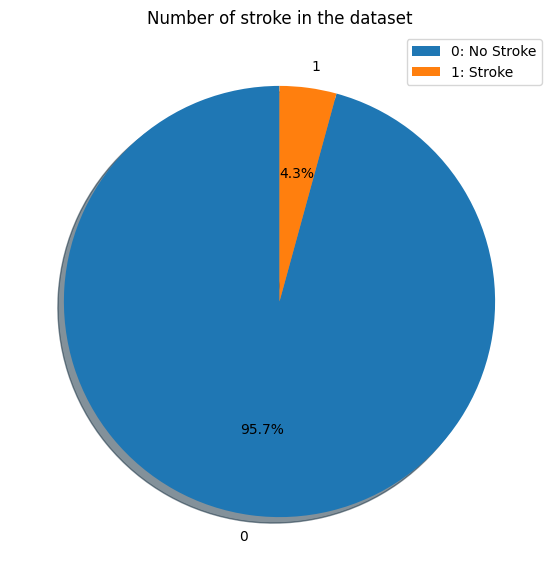

In [17]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.legend(['0: No Stroke', '1: Stroke'])
plt.show()

Answer: The ratio of stroke patients to non-stroke patients in this dataset is 1:24. It is not the same ratio in the real world. The ratio of stroke patients to non-stroke patients in the real world is 1:6.

### Question 2: Is there any difference between gender and stroke?

<Figure size 1700x700 with 0 Axes>

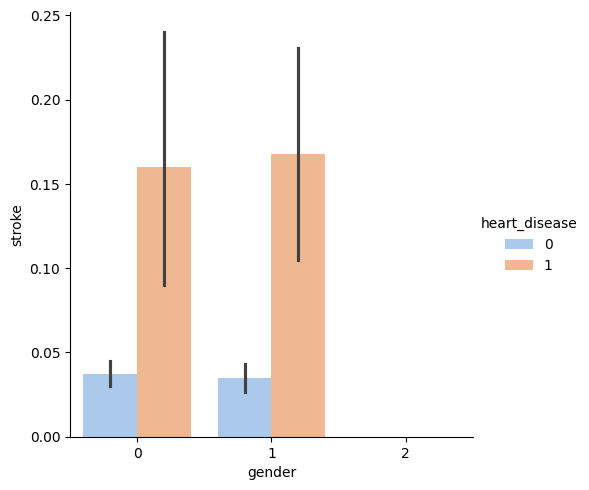

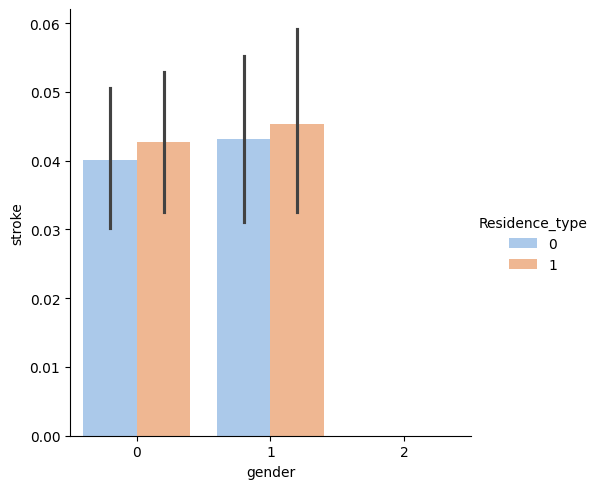

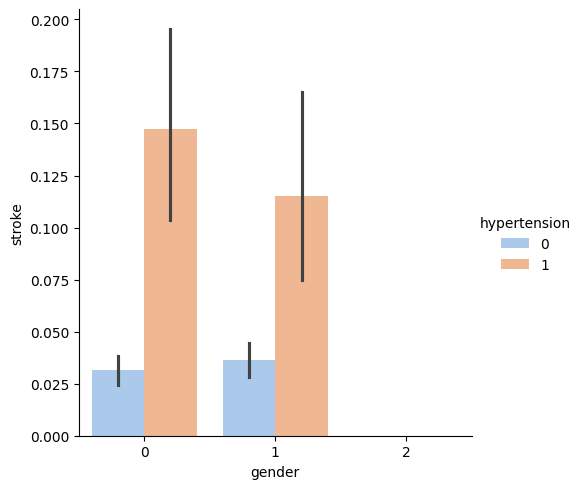

In [19]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

Answer: The relationship between male and female are the same in `heart_disease` and `residence_type`. But with hypertension features, the ratio of males is greater than females. 

### Question 3: What is the relationship between age and stroke?

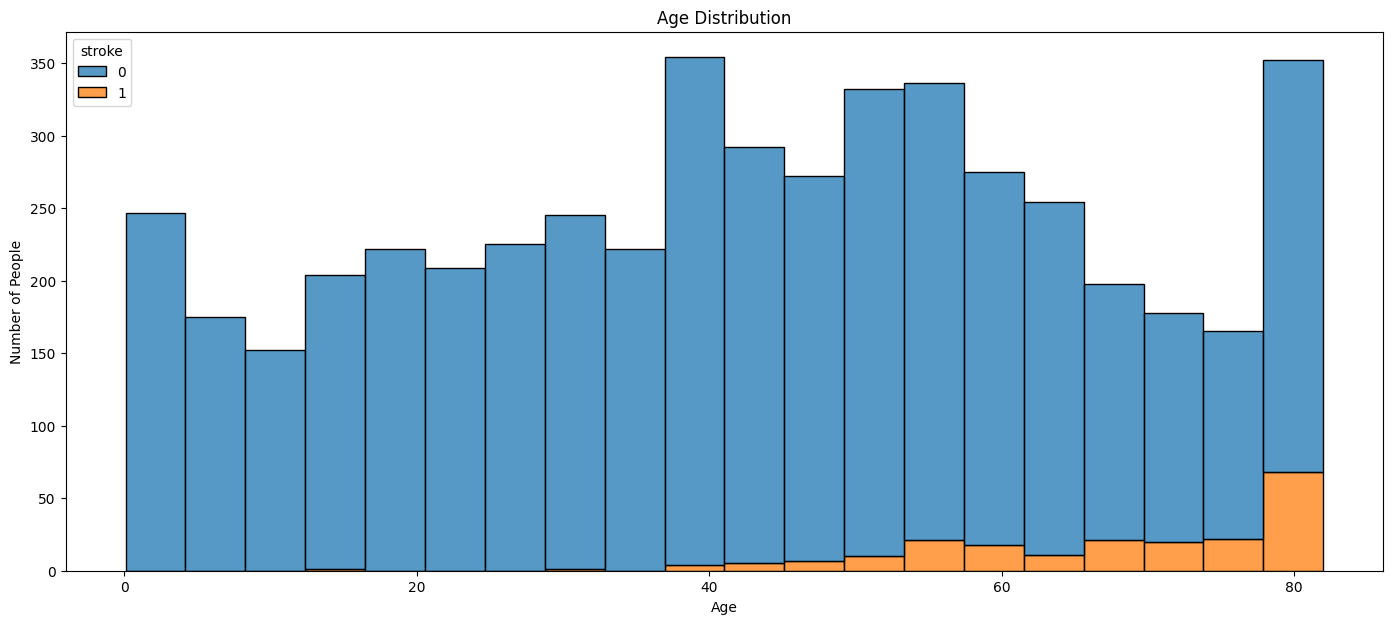

In [23]:
# Plot the relationship between age and stroke

plt.figure(figsize=(17,7))
sns.histplot(data=df, x="age", hue="stroke", multiple="stack")
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.show()

Answer: The relationship between age and stroke is positive. The older the age, the higher the risk of stroke.

## Correlation

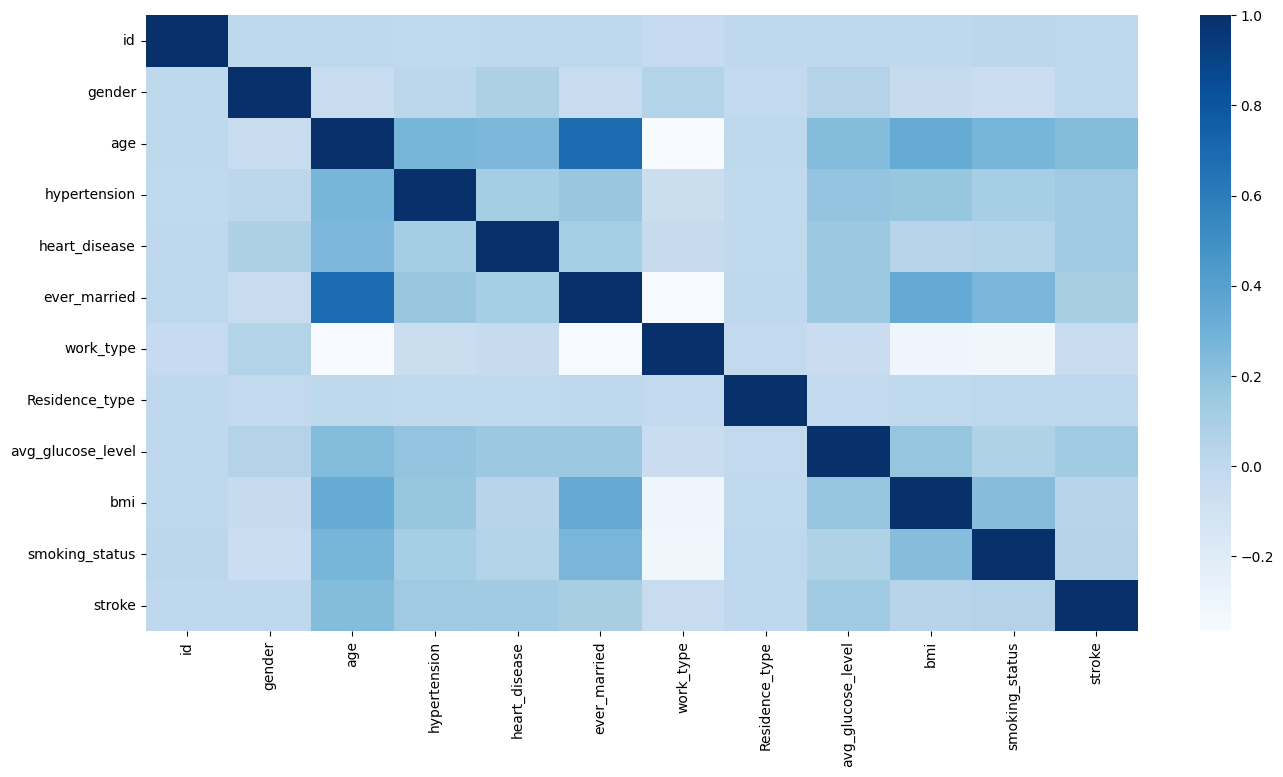

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="Blues");

We can see that the correlation between `age` and `stroke` and `married` is greater than 0.7.